In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
# dummyのデータセットを作る
X_gen, y_gen = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=2)

In [3]:
# numpy型をTensorに変換する
X = torch.from_numpy(X_gen.astype(np.float32)).cuda()
y = torch.from_numpy(y_gen.astype(np.float32)).cuda()

In [4]:
# それぞれの型の確認
print(type(X_gen))
print(type(X))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [5]:
X

tensor([[-8.7811e-01],
        [ 1.3596e+00],
        [ 1.6403e+00],
        [ 5.4235e-01],
        [ 8.2470e-01],
        [-5.9616e-01],
        [-5.6267e-02],
        [-1.3233e-01],
        [-2.4348e+00],
        [-4.0389e-01],
        [ 3.8187e-01],
        [ 1.3672e+00],
        [-7.4787e-01],
        [-3.8152e-01],
        [ 8.4246e-01],
        [-7.7219e-02],
        [ 4.3350e-01],
        [-2.1714e-01],
        [ 1.4677e+00],
        [ 1.1273e-01],
        [ 1.7312e+00],
        [-3.3568e-01],
        [-1.0987e+00],
        [-8.4175e-01],
        [ 5.6628e-01],
        [-1.0580e+00],
        [ 6.9512e-01],
        [ 5.3906e-01],
        [ 5.0186e-01],
        [-1.4394e+00],
        [-1.8947e-01],
        [-7.4471e-02],
        [-1.7934e+00],
        [ 2.2314e+00],
        [ 4.1539e-02],
        [ 1.1735e+00],
        [-1.3845e+00],
        [ 2.1612e-01],
        [-9.1453e-02],
        [ 1.2784e+00],
        [-2.1362e+00],
        [-2.3618e-01],
        [-1.8586e+00],
        [ 3

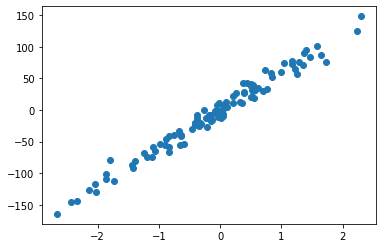

In [6]:
# 散布図でデータを見てみる
plt.scatter(X.cpu(), y.cpu())

In [7]:
# これに最適な線形回帰をPyTorchを使って解析する
# yは一次元なので二次元の形に変換する
y

tensor([-4.6354e+01,  7.1543e+01,  8.7662e+01,  3.8984e+01,  5.8920e+01,
        -5.4420e+01,  7.7974e+00, -1.5269e+01, -1.4519e+02, -1.9877e+01,
         2.7106e+01,  8.9842e+01, -3.8844e+01, -1.2973e+01,  5.1587e+01,
        -7.7176e-01,  4.3025e+01, -2.6197e+01,  8.3407e+01,  4.4929e+00,
         7.6010e+01, -2.0093e+01, -5.7805e+01, -5.7877e+01,  3.1615e+01,
        -6.4642e+01,  3.0859e+01,  3.0379e+01,  3.8811e+01, -8.6218e+01,
        -8.4037e+00, -1.4503e+00, -7.9389e+01,  1.2560e+02, -6.6897e+00,
         7.8098e+01, -7.9938e+01,  1.1297e+01, -3.3335e+00,  7.6539e+01,
        -1.2655e+02, -1.1817e+01, -1.0143e+02,  1.3380e+01, -6.8527e-01,
        -2.3991e+01,  7.4705e+01, -2.5761e+01, -3.3145e+01,  6.5615e+01,
        -6.7610e+01, -4.0769e+01, -2.2575e+01,  2.9195e+01, -1.0963e+02,
         1.0110e+02,  3.5369e+01,  6.1021e+01, -5.5526e+01, -1.1318e+01,
         1.0724e+01, -9.2375e+01,  1.1932e+01, -5.4410e+01,  1.0056e+00,
        -7.8236e+00,  6.3764e+01, -3.9597e+01, -1.6

In [8]:
# reshapeと同じ役割
y = y.view(-1, 1)

In [9]:
y

tensor([[-4.6354e+01],
        [ 7.1543e+01],
        [ 8.7662e+01],
        [ 3.8984e+01],
        [ 5.8920e+01],
        [-5.4420e+01],
        [ 7.7974e+00],
        [-1.5269e+01],
        [-1.4519e+02],
        [-1.9877e+01],
        [ 2.7106e+01],
        [ 8.9842e+01],
        [-3.8844e+01],
        [-1.2973e+01],
        [ 5.1587e+01],
        [-7.7176e-01],
        [ 4.3025e+01],
        [-2.6197e+01],
        [ 8.3407e+01],
        [ 4.4929e+00],
        [ 7.6010e+01],
        [-2.0093e+01],
        [-5.7805e+01],
        [-5.7877e+01],
        [ 3.1615e+01],
        [-6.4642e+01],
        [ 3.0859e+01],
        [ 3.0379e+01],
        [ 3.8811e+01],
        [-8.6218e+01],
        [-8.4037e+00],
        [-1.4503e+00],
        [-7.9389e+01],
        [ 1.2560e+02],
        [-6.6897e+00],
        [ 7.8098e+01],
        [-7.9938e+01],
        [ 1.1297e+01],
        [-3.3335e+00],
        [ 7.6539e+01],
        [-1.2655e+02],
        [-1.1817e+01],
        [-1.0143e+02],
        [ 1

In [10]:
# torchで線形モデルを作る
model = nn.Linear(1, 1).cuda()

In [11]:
# 損失関数の設定
# 平均二乗誤差
criterion = nn.MSELoss()

# 最適化アルゴリズム
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
# Epochの設定
epochs = 300

# 損失関数の状態をあとで確認できるように
loss_list = []

In [13]:
for epoch in range(epochs):
    # モデルの予測結果を入れる
    y_pred = model(X)
    # モデルの予測結果と、実際の結果の差分を損失関数で計算する
    loss = criterion(y_pred, y)
    
    # 勾配のリセットをする
    optimizer.zero_grad()
    
    # 勾配の更新を行う(逆電波法)
    loss.backward()
    # パラメータの更新を行う
    optimizer.step()
    
    # 損失関数のリストに追加
    loss_list.append(loss.item()) # .itemとすると数値などで扱える(指定しないとTensorのまま)
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch: {epoch+1}, loss={loss.item():.4f}')

Epoch: 50, loss=549.1025
Epoch: 100, loss=141.5121
Epoch: 150, loss=93.9864
Epoch: 200, loss=88.1492
Epoch: 250, loss=87.3948
Epoch: 300, loss=87.2928


In [14]:
# 損失関数の値が、Epochが増えるごとに減少しているのがわかる

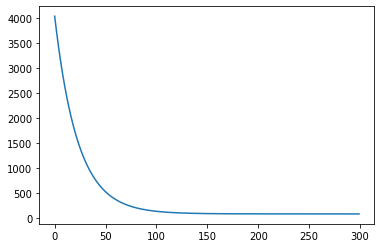

In [15]:
# loss_listをグラフ化
plt.plot(loss_list)

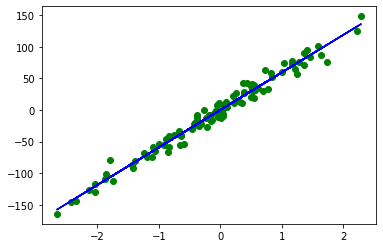

In [16]:
# 予測結果をOverviewで表示してみる

# 予測値が動かないようにする
with torch.no_grad():
    predicted_y = model(X).detach().cpu().numpy() # 予測結果がTensorになるので、detach().numpy()でNumpyに変換
    
    plt.plot(X_gen, y_gen, 'go') # 元のデータ
    plt.plot(X_gen, predicted_y, 'b') # 予測結果

In [17]:
# モデルの傾きと切片を出す
print(model.weight) # 傾き
print(model.bias) # 切片

Parameter containing:
tensor([[59.3767]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.1905], device='cuda:0', requires_grad=True)


# コロナウィルスの予測
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

## 今後1週間の予測をしてみる

In [18]:
# データのダウンロード
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 'time_series_covid19_confirmed_global.csv')


('time_series_covid19_confirmed_global.csv',
 <http.client.HTTPMessage at 0x1d51ca76b48>)

In [19]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 3417-05D0

 Directory of D:\PythonTraining\PythonAIフレームワークPyTorch入門(コロナウィルスの予測)

2020/07/04  10:44    <DIR>          .
2020/07/04  10:44    <DIR>          ..
2020/07/04  09:16    <DIR>          .ipynb_checkpoints
2020/07/04  10:44            12,732 PyTorchでコロナウイルスの予測(LSTM).ipynb
2020/07/04  10:44           162,966 time_series_covid19_confirmed_global.csv
               2 File(s)        175,698 bytes
               3 Dir(s)  959,413,268,480 bytes free


In [20]:
# GPUが利用可能か確認
print(torch.cuda.is_available())

True


In [21]:
import torch
import torch.nn as nn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import datetime
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler

In [22]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [23]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,189,197,212,212,259,267,276,284,291,315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,707,710,711,712,713,713,713,714,715,717
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,992,1015,1076,1089,1103,1118,1128,1158,1190,1221
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,265,265,272,272,272,272,272,303,303,303
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058


In [24]:
# Japanだけ抽出
df = df[df['Country/Region']=='Japan']
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20
139,NaN,Japan,36.0,138.0,2,2,2,2,4,4,...,17879,17963,18055,18162,18254,18366,18476,18615,18838,19055


In [25]:
df = df.iloc[:,4:].copy()
#df['4/16/20'] = [8626]
daily_japan=df.iloc[0,:]
daily_japan.index = pd.to_datetime(daily_japan.index)

daily_japan

2020-01-22        2
2020-01-23        2
2020-01-24        2
2020-01-25        2
2020-01-26        4
              ...  
2020-06-28    18366
2020-06-29    18476
2020-06-30    18615
2020-07-01    18838
2020-07-02    19055
Name: 139, Length: 163, dtype: int64

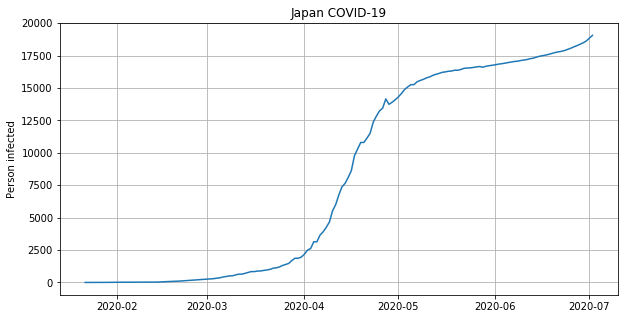

In [26]:
plt.figure(figsize=(10,5))
plt.plot(daily_japan)
plt.title("Japan COVID-19")
plt.grid(True)
plt.ylabel("Person infected")
plt.show()

In [27]:
y=daily_japan.values.astype(float)

In [28]:
def sequence_creator(input_data,window):
    dataset=[]
    data_len = len(input_data)
    for i in range(data_len - window):
        window_fr = input_data[i:i+window]
        label = input_data[i+window:i+window+1]
        dataset.append((window_fr,label))
    return dataset

In [29]:
class LSTM_COVID(nn.Module):
    def __init__(self, in_size=1, h_size=30, out_size=1):
        super().__init__()
        
        self.h_size = h_size
        self.lstm = nn.LSTM(in_size, h_size)
        self.fc = nn.Linear(h_size,out_size)
        
        self.hidden = (torch.zeros(1,1,self.h_size), torch.zeros(1,1,self.h_size))
        
    def forward(self, sequence_data):
        lstm_out, self.hidden = self.lstm(sequence_data.view(len(sequence_data),1,-1),self.hidden)
        pred = self.fc(lstm_out.view(len(sequence_data),-1))
        return pred[-1]


In [46]:
torch.manual_seed(3)

# モデル定義
model = LSTM_COVID()
# 損失関数 MSELoss
criterion = nn.MSELoss()
# 最適化
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [47]:
epochs = 100
window_size = 7
loss_list = []
loss_temp = 0

#model.train()


In [48]:
# データの正規化
scaler = MinMaxScaler(feature_range=(-1,1)) # -1から1に収まるように正規化
y_normalized = scaler.fit_transform(y.reshape(-1,1))
y_normalized = torch.FloatTensor(y_normalized).view(-1)
full_data = sequence_creator(y_normalized,window_size)


In [49]:
for epoch in range(epochs):
    for sequence_in, y_train in full_data:
        
        y_pred = model(sequence_in)
        
        loss = criterion(y_pred, y_train)
        loss_temp += loss
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.h_size),torch.zeros(1,1,model.h_size))
        
        loss.backward()
        optimizer.step()
        
    if((epoch+1) % 10 ==0):
        loss_list.append(loss_temp.item()/(10*len(full_data)))
        print(f'Epoch {epoch+1} Loss {loss_temp.item()/(10*len(full_data))}')
        loss_temp = 0


Epoch 10 Loss 0.15002779838366387
Epoch 20 Loss 0.004086195811247214
Epoch 30 Loss 0.0033878674873938927
Epoch 40 Loss 0.002731440311823136
Epoch 50 Loss 0.0020763777769528904
Epoch 60 Loss 0.001502299767274123
Epoch 70 Loss 0.0010216535666050055
Epoch 80 Loss 0.0006522514881231846
Epoch 90 Loss 0.0004203078838495108
Epoch 100 Loss 0.00031164918954555807


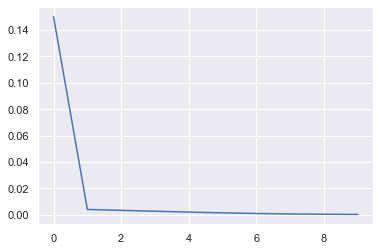

In [50]:
plt.plot(loss_list)


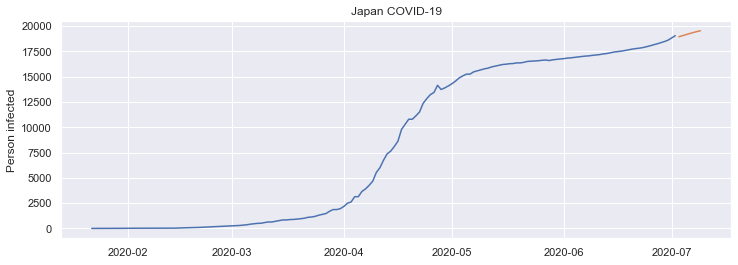

In [55]:
upcoming_future = 7
predictions = y_normalized[-window_size:].tolist()

model.eval()

for i in range(upcoming_future):
    sequence = torch.FloatTensor(predictions[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.h_size),torch.zeros(1,1,model.h_size))
        predictions.append(model(sequence).item())
        
predictions_y = scaler.inverse_transform(np.array(predictions).reshape(-1,1))
x = np.arange('2020-07-03','2020-07-10', dtype='datetime64[D]').astype('datetime64[D]')
sns.set()
plt.figure(figsize = (12,4))
plt.title("Japan COVID-19")
plt.grid(True)
plt.ylabel("Person infected")
plt.plot(daily_japan)
plt.plot(x,predictions_y[-window_size:])
plt.show()


In [52]:
predictions_y[-window_size:]


array([[18946.47186607],
       [19055.75974804],
       [19164.23564219],
       [19268.95935768],
       [19369.21430105],
       [19462.71668559],
       [19545.00568873]])